In [53]:
%reload_ext autoreload
%autoreload 2

In [54]:
import os, sys
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)


import pandas as pd
from src.dbdata_loader import load_data
import src.data_cleaner as cleaner
import src.plotting as plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps



In [4]:
# Load data using the function from the module
df = load_data(credentials_file='../env_vars.txt')

# Now, you can use the DataFrame 'df' in your notebook
df.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
new_df=df.copy()

In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [7]:
# the top 10 handsets used by the customers

top_handsets = new_df['Handset Type'].value_counts().head(10)
print(f'the top 10 handset used by customers \n {top_handsets}')

the top 10 handset used by customers 
 Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [9]:
#the top 3 handset manufacturers

top_manufacturers = new_df['Handset Manufacturer'].value_counts().head(3)
print(f'the top 3 handset manufacturers \n {top_manufacturers}')

the top 3 handset manufacturers 
 Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [10]:
#the top 5 handsets per top 3 handset manufacturer
for manufacturer in top_manufacturers.index[:3]:
    top_handsets_per_manufacturer = new_df[new_df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

print(f'the top 5 handsets per top 3 handset manufacturer \n {top_handsets_per_manufacturer}')

the top 5 handsets per top 3 handset manufacturer 
 Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


In [11]:
# percentage of missing values in the data
cleaner.percent_missing(new_df)

The dataset contains 12.5 % missing values.


In [12]:
cleaner.missing_values_table(new_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6,float64
Nb of sec with 125000B < Vol DL,97538,65.0,float64
TCP UL Retrans. Vol (Bytes),96649,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9,float64
TCP DL Retrans. Vol (Bytes),88146,58.8,float64
HTTP UL (Bytes),81810,54.5,float64
HTTP DL (Bytes),81474,54.3,float64


In [17]:
# Aggregate per user information in the column for each application
# List of columns to select
selected_columns = [
    'MSISDN/Number','Dur. (ms)',
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)',
    'Total UL (Bytes)', 'Total DL (Bytes)',
    'Bearer Id'  # Include 'Bearer Id' for counting sessions
]

# Selecting the specified columns
selected_data = new_df[selected_columns]

# Grouping by 'MSISDN/Number' and counting the number of unique 'Bearer Ids'
grouped_data = selected_data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'nunique',  # Count unique 'Bearer Ids' for sessions
    'Dur. (ms)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
}).reset_index()

# Rename 'Bearer Id' column to 'Number of xDR sessions'
grouped_data = grouped_data.rename(columns={'Bearer Id': 'Number of xDR sessions'})
grouped_data = grouped_data.rename(columns={'Dur. (ms)': 'Session duration (ms)'})
grouped_data.head()

,MSISDN/Number,Number of xDR sessions,Session duration (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,3.360100e+10,1,116720.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,36053108.0,8.426375e+08
1,3.360100e+10,1,181230.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,36104459.0,1.207552e+08
2,3.360100e+10,1,134969.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,39306820.0,5.566597e+08
3,3.360101e+10,1,49878.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,20327526.0,4.019932e+08
4,3.360101e+10,2,37104.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,94280527.0,1.363130e+09


In [22]:
grouped_data.describe()

,MSISDN/Number,Number of xDR sessions,Session duration (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.068560e+05,106856.000000,1.068560e+05,1.068560e+05,106856.000000,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,4.511474e+10,1.375945,1.461672e+05,2.502081e+06,45886.012802,8.016496e+06,2.865938e+06,2.497352e+06,6.514435e+05,1.621461e+07,1.534379e+07,1.620639e+07,1.533194e+07,5.882158e+08,1.155326e+07,5.869916e+08,1.151716e+07,5.730942e+07,6.336527e+08
std,2.889423e+12,0.780761,1.863587e+05,1.887588e+06,34717.044775,6.065160e+06,2.172787e+06,1.897063e+06,4.948601e+05,1.232294e+07,1.159870e+07,1.231717e+07,1.161060e+07,4.440290e+08,8.731469e+06,4.437790e+08,8.706879e+06,3.565765e+07,4.645551e+08
min,3.360100e+10,0.000000,7.142000e+03,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,9.700000e+01,1.400000e+01,5.300000e+01,1.060000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.560000e+02,2.866892e+06,8.827082e+06
25%,3.365088e+10,1.000000,7.130800e+04,1.175902e+06,21600.750000,3.802894e+06,1.341100e+06,1.184544e+06,3.065678e+05,7.647143e+06,7.246758e+06,7.593534e+06,7.206775e+06,2.793230e+08,5.445849e+06,2.767785e+08,5.461189e+06,3.639547e+07,3.148271e+08
50%,3.366365e+10,1.000000,1.027400e+05,2.265000e+06,41559.500000,7.256742e+06,2.593314e+06,2.266259e+06,5.872975e+05,1.460547e+07,1.386731e+07,1.463991e+07,1.387814e+07,5.325190e+08,1.044654e+07,5.299489e+08,1.037673e+07,4.679387e+07,5.703677e+08
75%,3.368344e+10,2.000000,1.727990e+05,3.267238e+06,59919.250000,1.043106e+07,3.743934e+06,3.250651e+06,8.525612e+05,2.112900e+07,1.997808e+07,2.113463e+07,2.000853e+07,7.669561e+08,1.508080e+07,7.653643e+08,1.502752e+07,6.573199e+07,8.073645e+08
max,8.823971e+14,18.000000,1.855375e+07,4.274384e+07,630942.000000,1.161065e+08,3.608540e+07,3.360721e+07,9.013997e+06,2.378830e+08,2.150757e+08,1.994792e+08,2.032419e+08,7.622035e+09,1.547897e+08,8.025477e+09,1.529305e+08,7.295774e+08,8.156743e+09


In [27]:
# basic metrics 
grouped_data.describe()

,MSISDN/Number,Number of xDR sessions,Session duration (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.068560e+05,106856.000000,1.068560e+05,1.068560e+05,106856.000000,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,4.511474e+10,1.375945,1.461672e+05,2.502081e+06,45886.012802,8.016496e+06,2.865938e+06,2.497352e+06,6.514435e+05,1.621461e+07,1.534379e+07,1.620639e+07,1.533194e+07,5.882158e+08,1.155326e+07,5.869916e+08,1.151716e+07,5.730942e+07,6.336527e+08
std,2.889423e+12,0.780761,1.863587e+05,1.887588e+06,34717.044775,6.065160e+06,2.172787e+06,1.897063e+06,4.948601e+05,1.232294e+07,1.159870e+07,1.231717e+07,1.161060e+07,4.440290e+08,8.731469e+06,4.437790e+08,8.706879e+06,3.565765e+07,4.645551e+08
min,3.360100e+10,0.000000,7.142000e+03,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,9.700000e+01,1.400000e+01,5.300000e+01,1.060000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.560000e+02,2.866892e+06,8.827082e+06
25%,3.365088e+10,1.000000,7.130800e+04,1.175902e+06,21600.750000,3.802894e+06,1.341100e+06,1.184544e+06,3.065678e+05,7.647143e+06,7.246758e+06,7.593534e+06,7.206775e+06,2.793230e+08,5.445849e+06,2.767785e+08,5.461189e+06,3.639547e+07,3.148271e+08
50%,3.366365e+10,1.000000,1.027400e+05,2.265000e+06,41559.500000,7.256742e+06,2.593314e+06,2.266259e+06,5.872975e+05,1.460547e+07,1.386731e+07,1.463991e+07,1.387814e+07,5.325190e+08,1.044654e+07,5.299489e+08,1.037673e+07,4.679387e+07,5.703677e+08
75%,3.368344e+10,2.000000,1.727990e+05,3.267238e+06,59919.250000,1.043106e+07,3.743934e+06,3.250651e+06,8.525612e+05,2.112900e+07,1.997808e+07,2.113463e+07,2.000853e+07,7.669561e+08,1.508080e+07,7.653643e+08,1.502752e+07,6.573199e+07,8.073645e+08
max,8.823971e+14,18.000000,1.855375e+07,4.274384e+07,630942.000000,1.161065e+08,3.608540e+07,3.360721e+07,9.013997e+06,2.378830e+08,2.150757e+08,1.994792e+08,2.032419e+08,7.622035e+09,1.547897e+08,8.025477e+09,1.529305e+08,7.295774e+08,8.156743e+09


In [29]:
# Calculate skewness, kurtosis, and unique counts
grouped_data.skew()


MSISDN/Number              281.347080
Number of xDR sessions       3.245756
Session duration (ms)       20.539551
Social Media DL (Bytes)      2.064133
Social Media UL (Bytes)      2.015622
Google DL (Bytes)            2.064540
Google UL (Bytes)            2.032406
Email DL (Bytes)             2.099718
Email UL (Bytes)             2.056152
Youtube DL (Bytes)           2.072224
Youtube UL (Bytes)           2.069953
Netflix DL (Bytes)           2.021664
Netflix UL (Bytes)           2.023251
Gaming DL (Bytes)            2.040510
Gaming UL (Bytes)            2.008822
Other DL (Bytes)             1.978933
Other UL (Bytes)             2.030694
Total UL (Bytes)             2.895198
Total DL (Bytes)             2.149144
dtype: float64

In [32]:
# Calculate kurtosis
grouped_data.kurt()

MSISDN/Number              83114.379026
Number of xDR sessions        20.492408
Session duration (ms)       1237.832575
Social Media DL (Bytes)       11.318804
Social Media UL (Bytes)        9.532281
Google DL (Bytes)             10.016373
Google UL (Bytes)              9.502010
Email DL (Bytes)              10.474712
Email UL (Bytes)               9.872827
Youtube DL (Bytes)            10.018171
Youtube UL (Bytes)            10.458669
Netflix DL (Bytes)             9.225176
Netflix UL (Bytes)             9.415377
Gaming DL (Bytes)              9.862256
Gaming UL (Bytes)              9.313375
Other DL (Bytes)               8.810637
Other UL (Bytes)               9.608764
Total UL (Bytes)              16.599142
Total DL (Bytes)              10.679149
dtype: float64

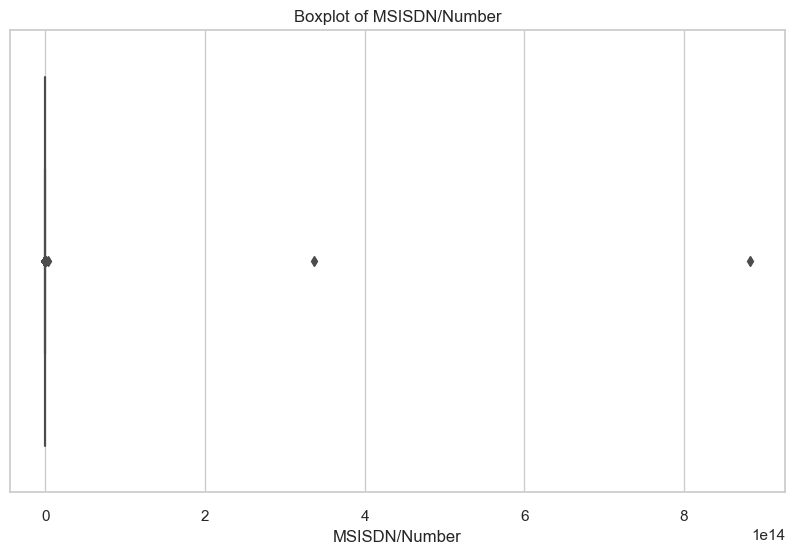

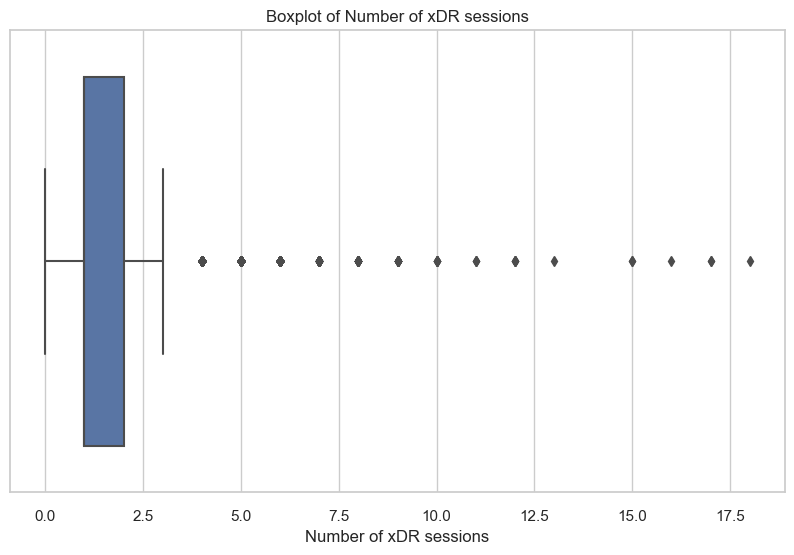

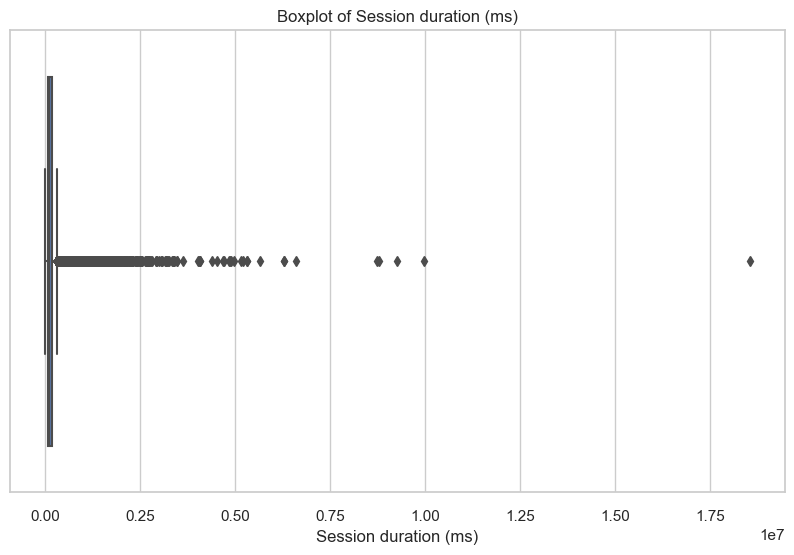

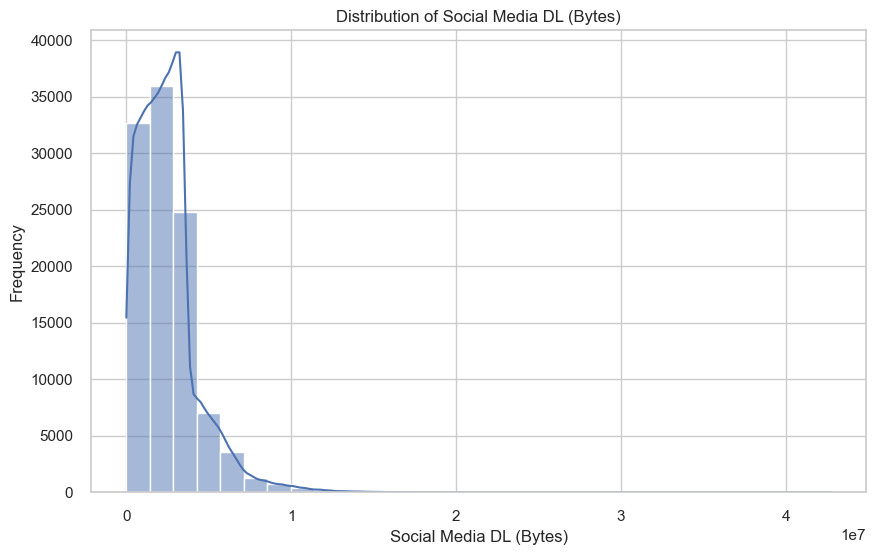

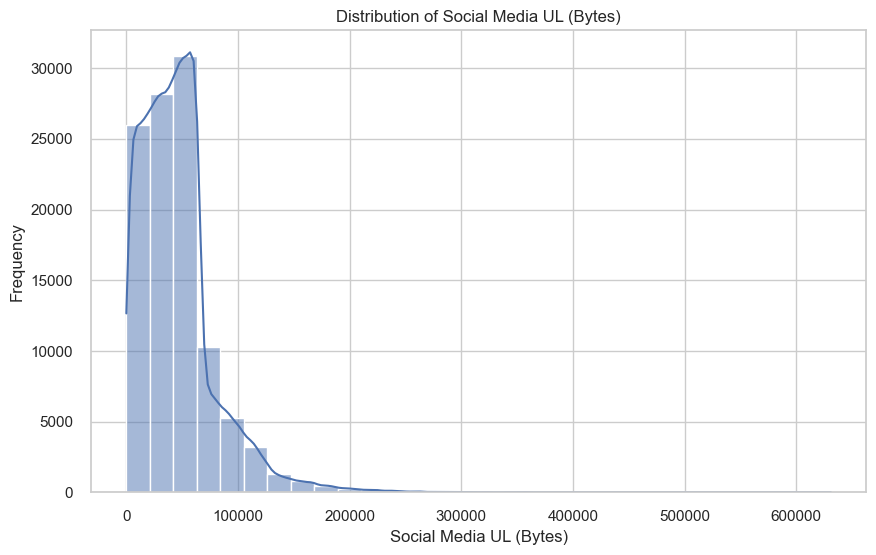

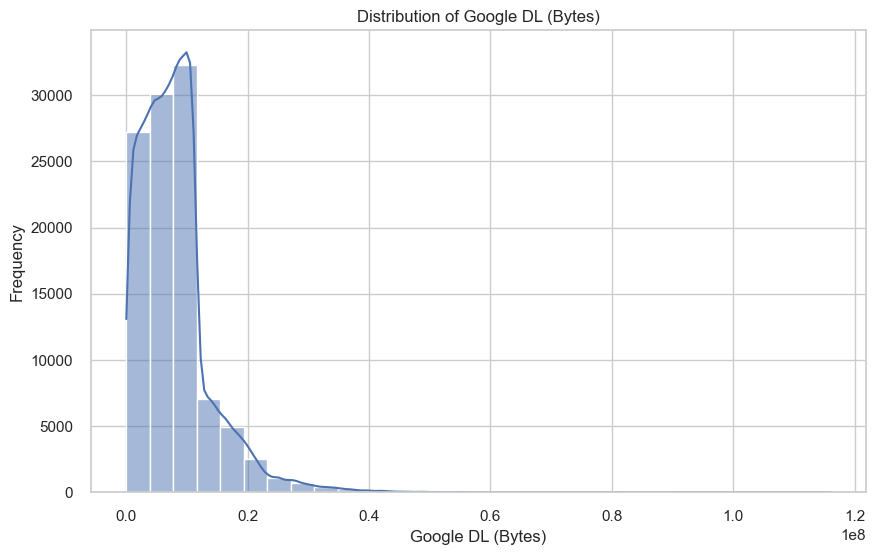

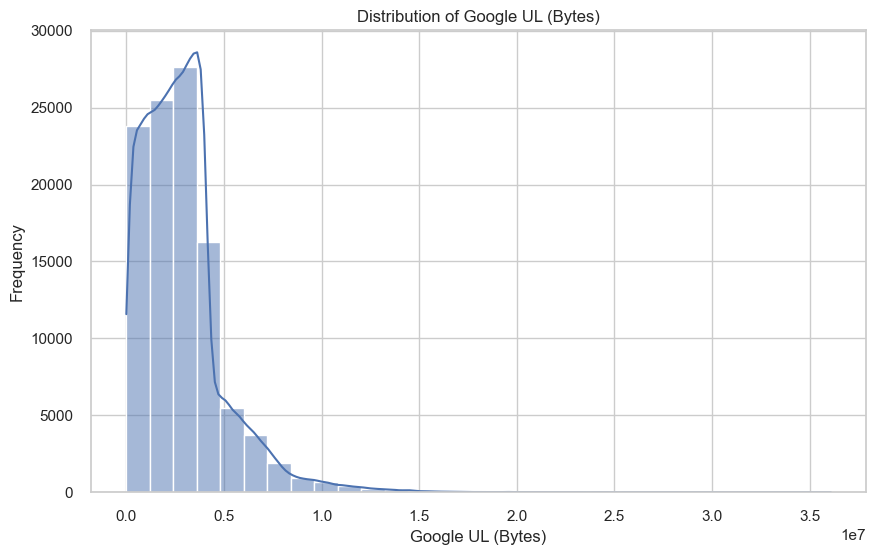

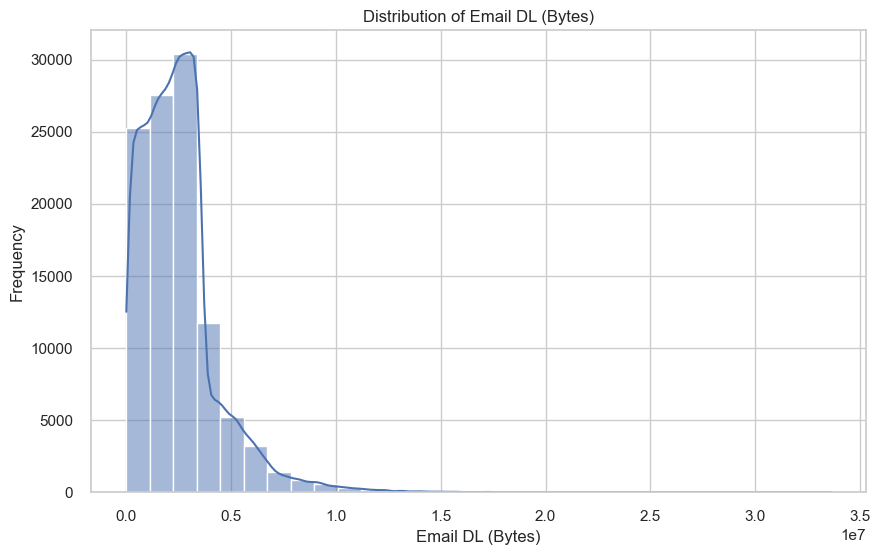

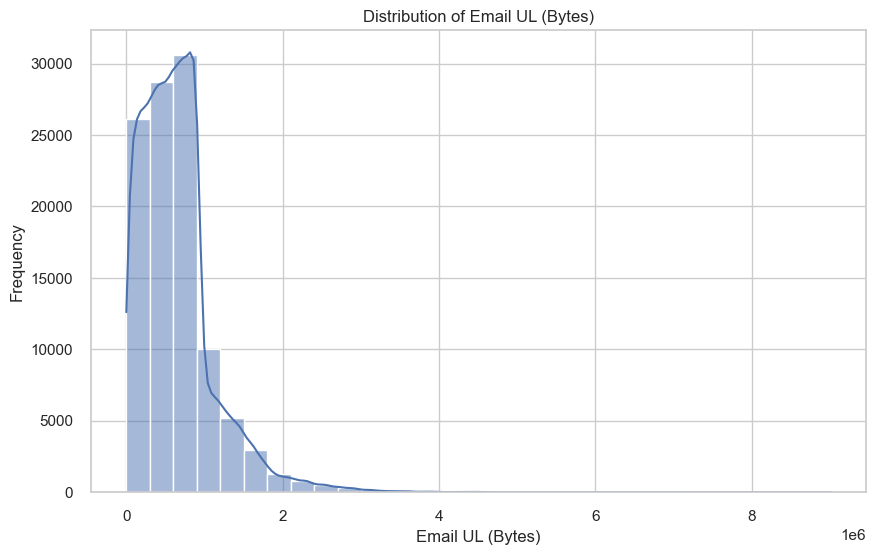

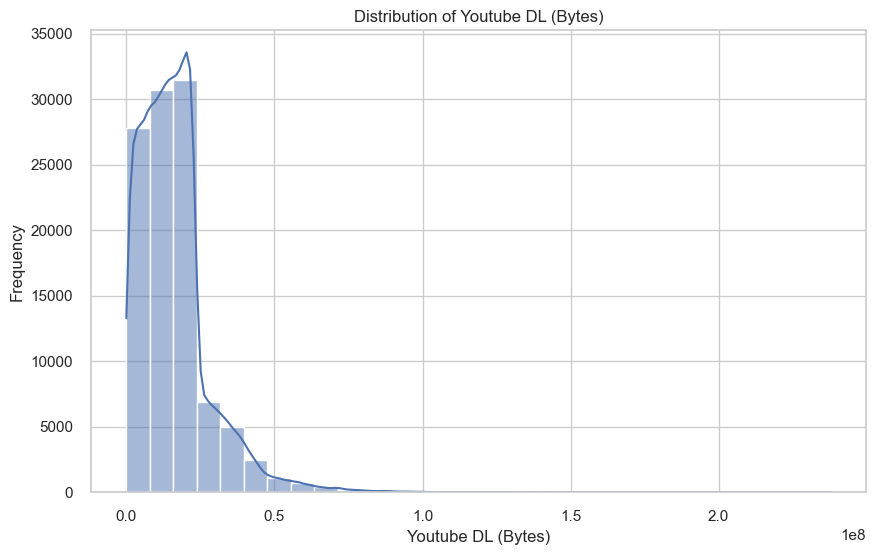

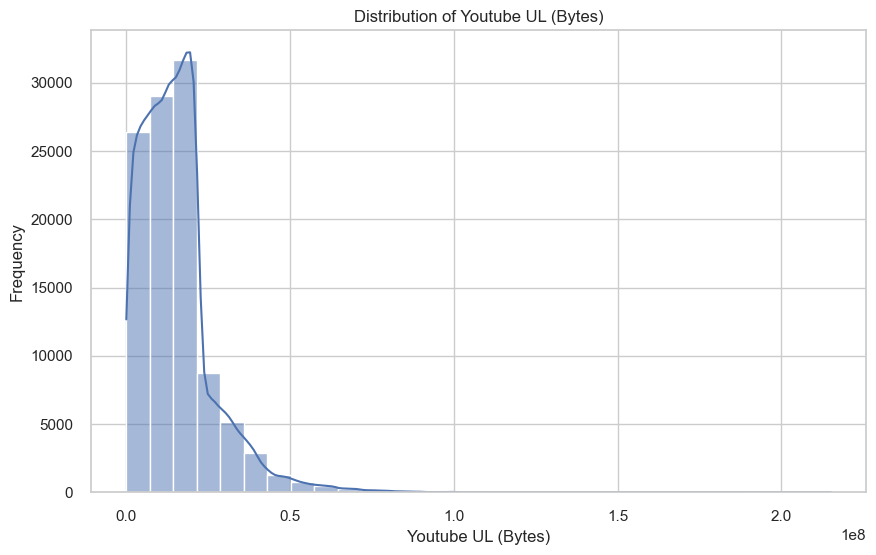

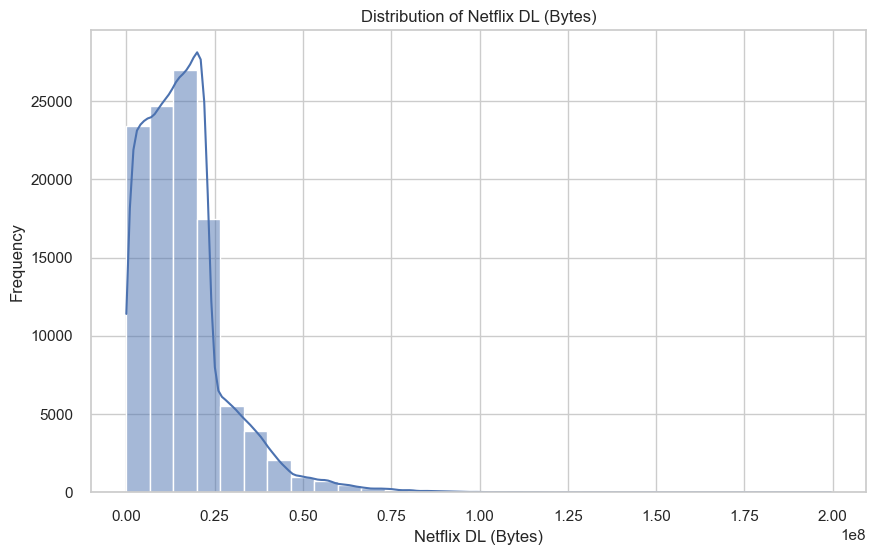

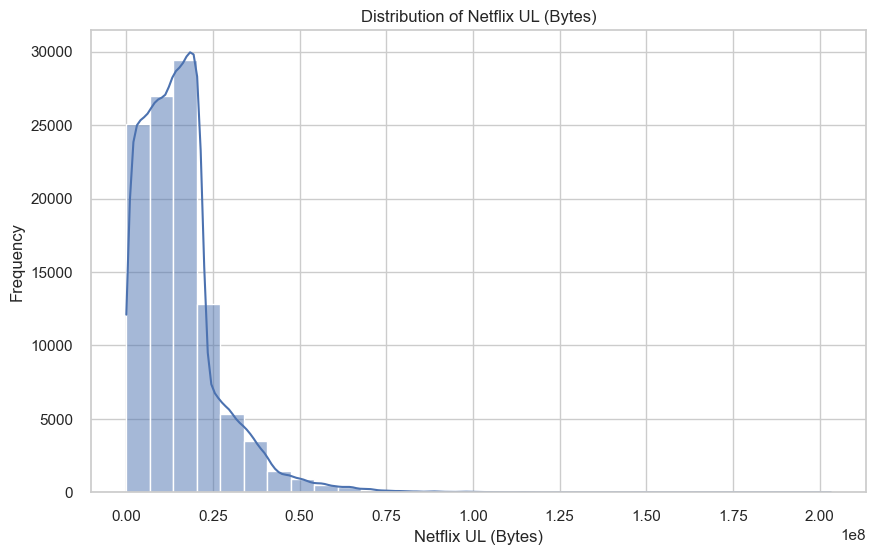

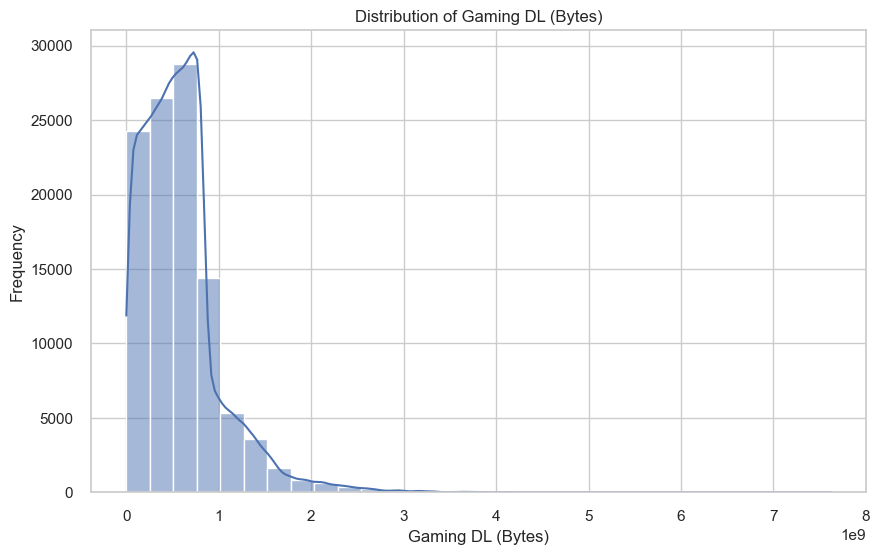

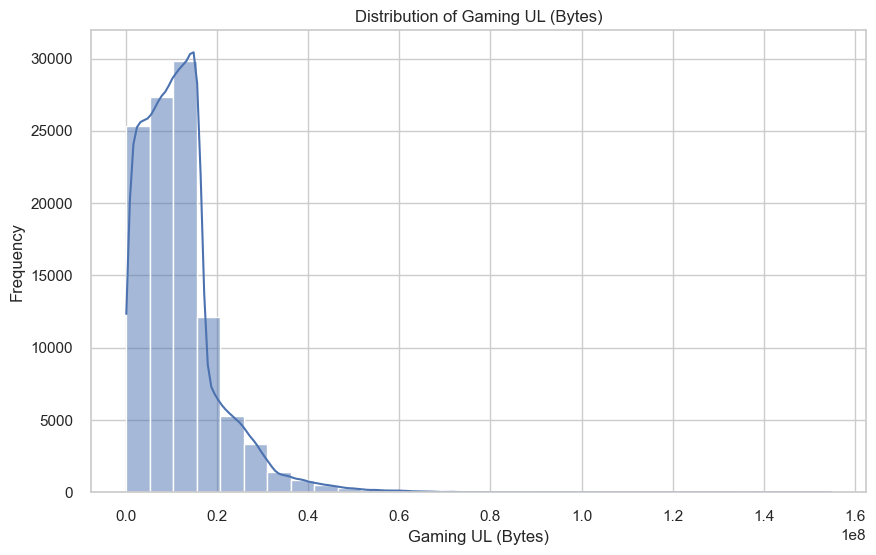

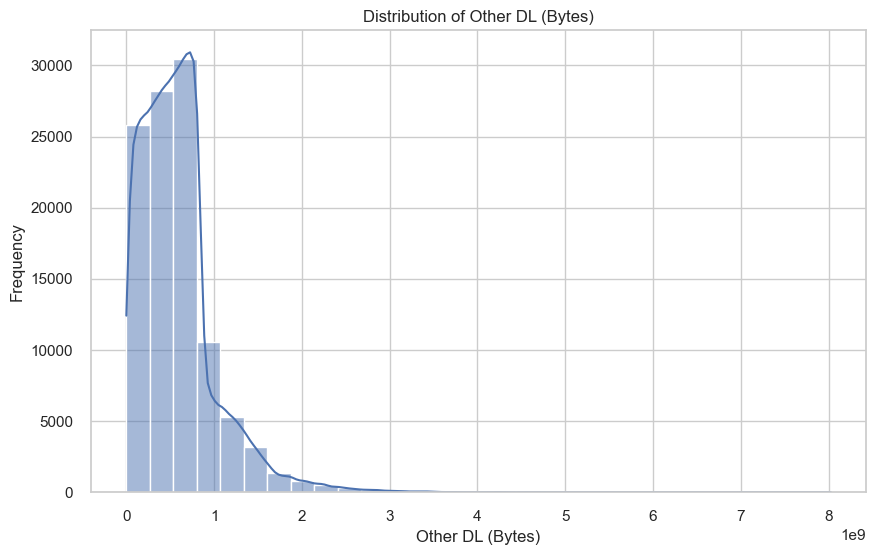

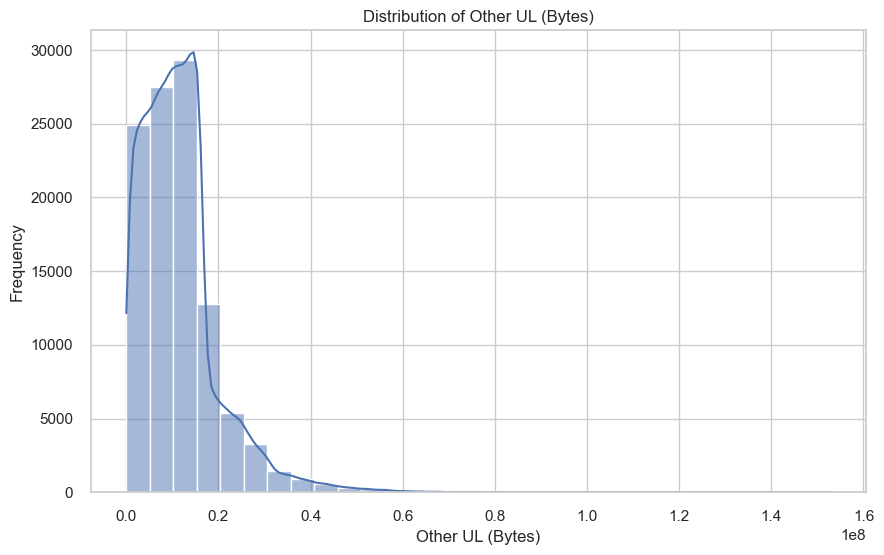

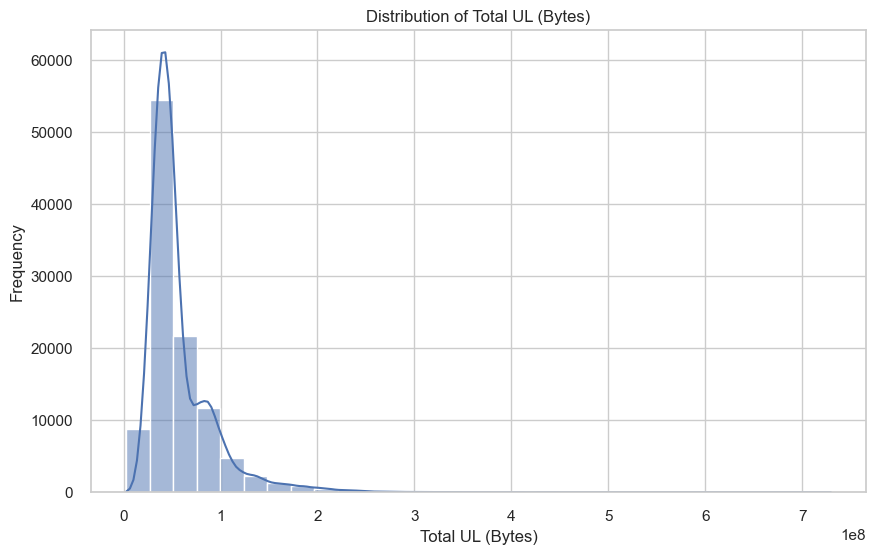

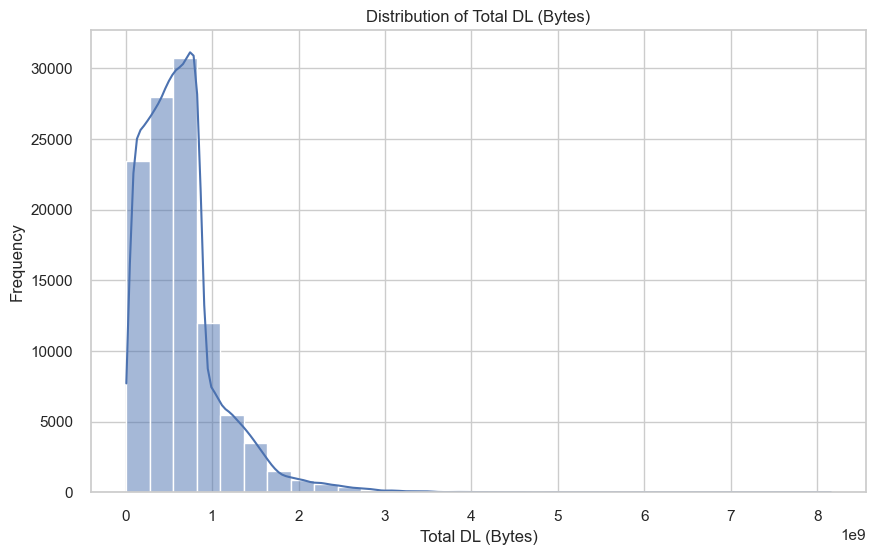

In [36]:
# graphical Graphical Univariate Analysis
plotting.univariate_analysis(grouped_data)

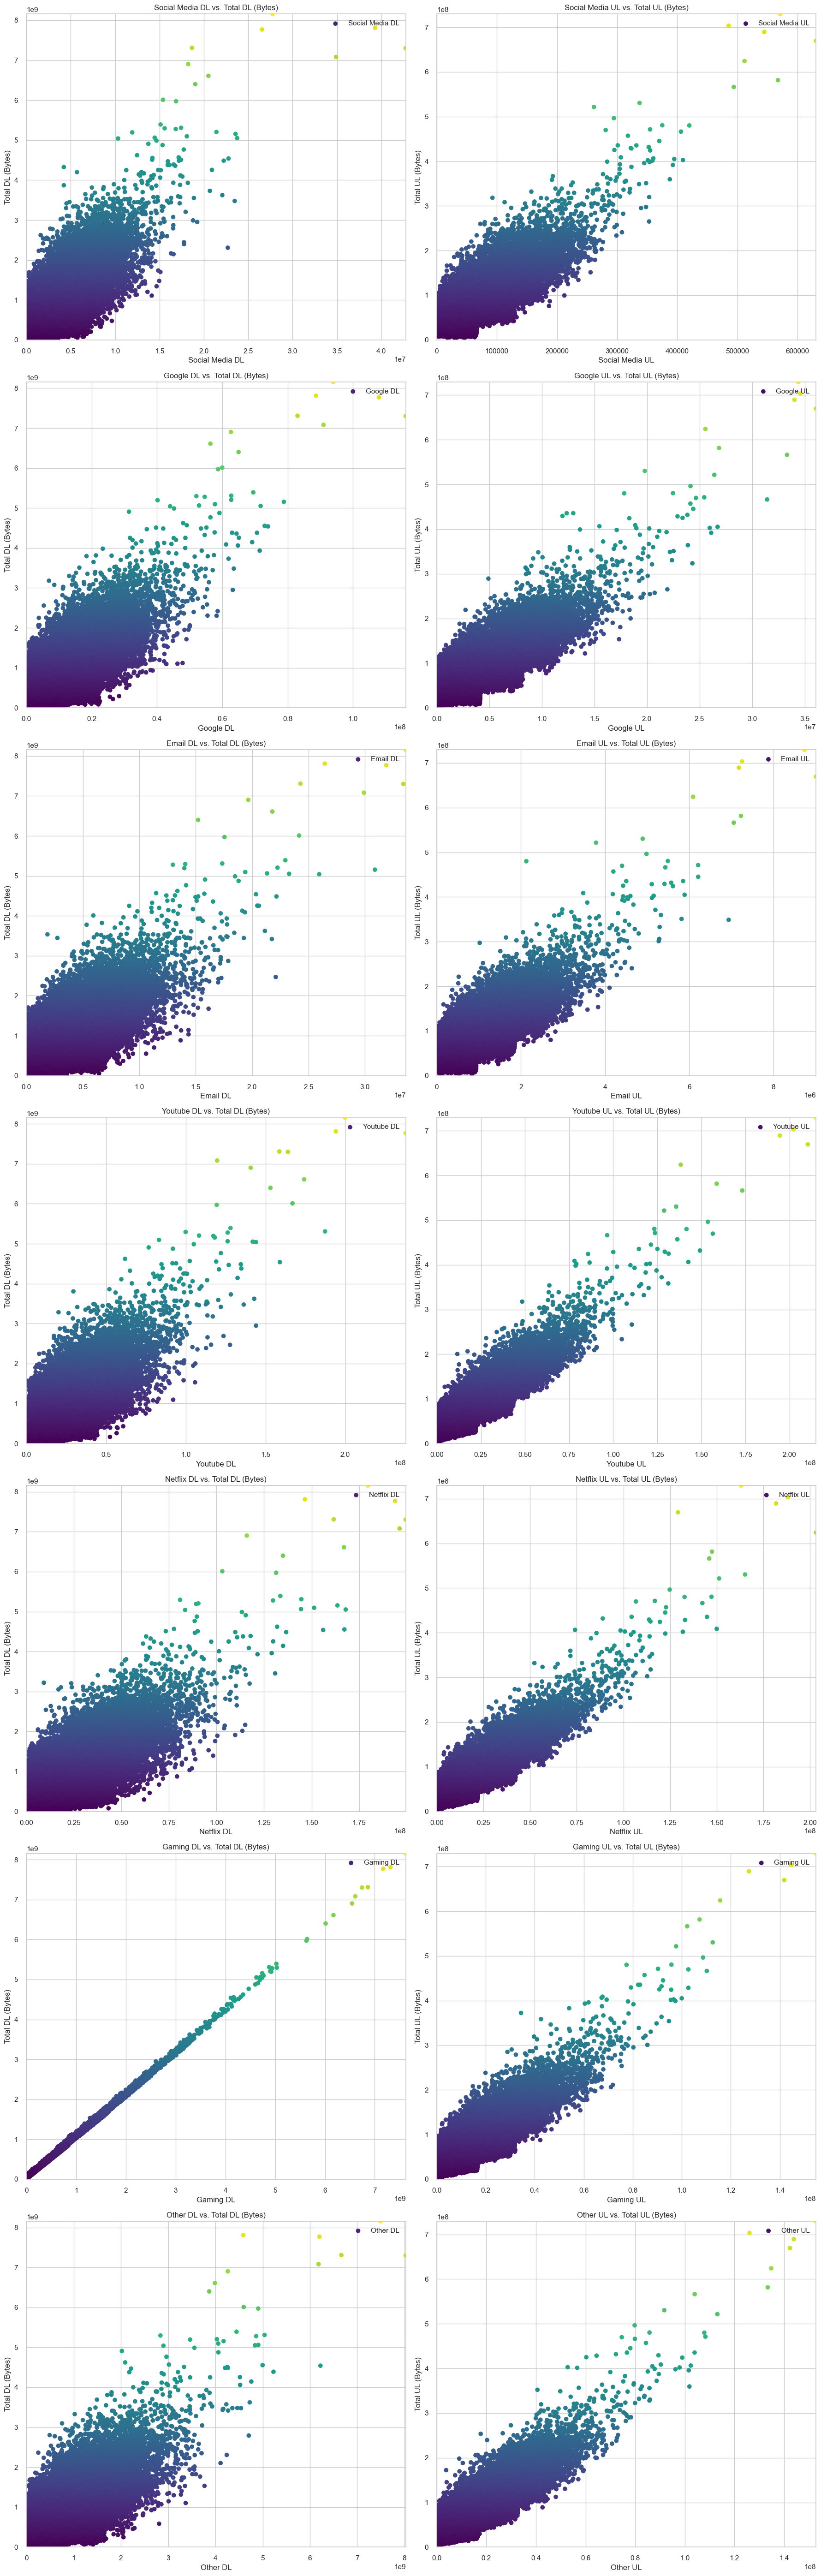

In [63]:

app_columns = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

total_dl_col = 'Total DL (Bytes)'
total_ul_col = 'Total UL (Bytes)'

plotting.bivariate_analysis(grouped_data, app_columns, total_dl_col, total_ul_col)

In [66]:
grouped_data.columns


Index(['MSISDN/Number', 'Number of xDR sessions', 'Session duration (ms)',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)'],
      dtype='object')

In [72]:
# Segment users into deciles based on total duration
grouped_data['Decile'] = pd.qcut(grouped_data['Session duration (ms)'], q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], labels=False)

# Compute total data (DL+UL) per decile class
decile_totals = grouped_data.groupby('Decile').agg({
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
}).reset_index()
# Print the resulting DataFrame
print(decile_totals.set_index('Decile'))

        Total UL (Bytes)  Total DL (Bytes)
Decile                                    
0           4.494350e+11      4.989842e+12
1           5.053079e+11      5.604102e+12
2           5.437496e+11      5.992652e+12
3           5.006783e+11      5.533562e+12
4           4.271904e+11      4.716541e+12
5           5.333274e+11      5.892924e+12
6           5.056942e+11      5.646784e+12
7           6.522641e+11      7.169970e+12
8           7.702495e+11      8.535245e+12
9           1.235959e+12      1.362797e+13
